# EMAIL SPAM CLASSIFICATION USING LOGISTIC REGRESSION , CNN ,NAIVE BAYES 

APPLICATION : Identify an eamil is spam or not


AJAY KUMAR GAUTAM ||IITG||SPML||

In [1]:
#Importing the Library 
import numpy as np 
import pandas as pd
import string 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. LOGISTIC REGRESSION

In [2]:
# Reading the dataset 
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
#df.head()
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()
#df_copy
# Removing Punctuation from dataframe
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass 
    return x
df_copy = df_copy.apply(remove_punctuation)
#df_copy
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)
Email_Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Email_Spam_model.fit(email_train, spam_nospam_train)
pred = Email_Spam_model.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))



Accuracy is: 0.9597989949748744


C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# 2.CNN

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('C:/data/spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()

In [6]:
df['Spam/Not_Spam'] = df['Spam/Not_Spam'].map({'ham' : 0, 'spam' : 1})
y = df['Spam/Not_Spam'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['email'], y, test_size = 0.3)

In [8]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(X_train)
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

In [9]:
l = len(tokenizer.word_index)
print(f'{l} number of tokens found')

7333 number of tokens found


In [10]:
train_seq = pad_sequences(train_seq)
test_seq = pad_sequences(test_seq, maxlen = train_seq.shape[1])

In [13]:
i_p = Input(shape = (train_seq.shape[1],))
o_p = Embedding(l+1, 25)(i_p)
o_p = Conv1D(32, 3, activation = 'relu')(o_p)
o_p = MaxPooling1D(3)(o_p)
o_p = Conv1D(64, 3, activation = 'relu')(o_p)
o_p = MaxPooling1D(3)(o_p)
o_p = Conv1D(128, 3, activation = 'relu')(o_p)
o_p = GlobalMaxPooling1D()(o_p)
o_p = Dense(1, activation = 'sigmoid')(o_p)

model = Model(i_p,o_p)

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
r = model.fit(train_seq , y_train, validation_data = (test_seq , y_test), epochs = 10)

Epoch 1/10
122/122 [==============================] - 5s 26ms/step - loss: 0.3810 - accuracy: 0.8638 - val_loss: 0.2642 - val_accuracy: 0.8642
Epoch 2/10
122/122 [==============================] - 3s 25ms/step - loss: 0.1293 - accuracy: 0.9459 - val_loss: 0.0606 - val_accuracy: 0.9850
Epoch 3/10
122/122 [==============================] - 2s 19ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 4/10
122/122 [==============================] - 2s 19ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0547 - val_accuracy: 0.9868
Epoch 5/10
122/122 [==============================] - 3s 24ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.0510 - val_accuracy: 0.9874
Epoch 6/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0690 - val_accuracy: 0.9874
Epoch 7/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0698 - val_accuracy: 0.9868

In [16]:
def history_plot(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = 'validation '+argument)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(argument)
    plt.title(argument)

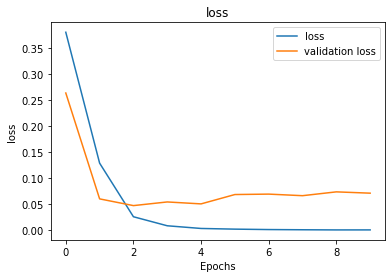

In [17]:
history_plot(r, 'loss')

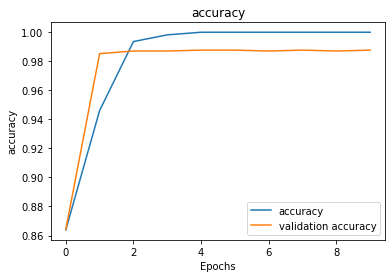

In [18]:

history_plot(r, 'accuracy')

# 3 . NAIVE BAYES CLASSIFIER

In [19]:
from sklearn.naive_bayes import MultinomialNB
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
#df.head()
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()
#df_copy
# Removing Punctuation from dataframe
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass 
    return x
df_copy = df_copy.apply(remove_punctuation)
#df_copy
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)

C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [20]:
pred = Email_Spam_model.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))

Accuracy is: 0.9597989949748744
